# Iterative Method for System of Linear Equation

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />This notebook by Xiaozhou Li is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

## General Form 
For solving the linear system
$$
    Ax = b,
$$
with the exact solution $x^{*}$.  The general form based on the fixed point interation:
\begin{equation}
     \begin{split}
          x^{(0)} & = \text{initial guess} \\
          x^{(k+1)} & = g(x^{(k)}) \quad n = 0,1,2,\ldots,
     \end{split}
\end{equation}
where
$$
    g(x) = x - C(Ax - b).
$$
Difficult: find a matrix $C$ such that 
$$
    \lim\limits_{k\rightarrow\infty}x^{(k)} = x^{*}
$$
and the algorithm needs to be converge fast and economy. 

**Example 1**
\begin{equation*}
    A = \left[\begin{array}{ccc} 9& -1 & -1 \\ -1 & 10 & -1 \\ -1 & -1& 15\end{array}\right],\quad b = \left[\begin{array}{c} 7 \\ 8 \\ 13\end{array}\right],
\end{equation*}
has the exact solution $x^{*} = {[1, 1, 1]}^T$

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [2]:
def IterC(A, b, C, x0, x_star, iters):
    x = np.copy(x0)
    print (0, x, np.linalg.norm(x_star-x,1))
    for i in range(iters):
        x = x + np.dot(C, b - np.dot(A,x))
        print (i+1, x, np.linalg.norm(x_star-x,1))

In [3]:
A = np.array([[9., -1., -1.],[-1.,10.,-1.],[-1.,-1.,15.]])
b = np.array([7.,8.,13.])

C = np.diag(1./np.diag(A))
#C = np.eye(np.size(b))
x0 = np.zeros(np.size(b))
x0 = np.array([0,1.,0])
x_star = np.array([1.,1.,1.])
#IterC(A, b, C, x0, x_star, 10)

In [4]:
w = interactive(IterC, A=fixed(A), b=fixed(b), C=fixed(C), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

## Jacobi Method
### Matrix Form:
$$
    x^{(k+1)} = x^{(k)} - D^{-1}(Ax^{(k)} - b)
$$
or
$$
    Dx^{(k+1)} = b - (L+U)x^{(k)}
$$
### Algorithm
$$
    x^{(k+1)}_i = \frac{b_i - \sum\limits_{j < i}a_{ij}x^{(k)}_j - \sum\limits_{j > i}a_{ij}x^{(k)}_j}{a_{ii}}
$$

In [5]:
def Jacobi(A, b, x0, x_star, iters):
    x_old = np.copy(x0)
    x_new = np.zeros(np.size(x0))
    print (0, x_old, np.linalg.norm(x_star-x_old,1))
    for k in range(iters):
        for i in range(np.size(x0)): 
            x_new[i] = (b[i] - np.dot(A[i,:i],x_old[:i]) - np.dot(A[i,i+1:],x_old[i+1:]))/A[i,i]
        print (k+1, x_new, np.linalg.norm(x_star-x_new,1))
        x_old = np.copy(x_new)

In [51]:
def Jacobi1(A, b, x0, x_star, iters):
    x_old = np.copy(x0)
    x_new = np.zeros(np.size(x0))
    print (0, np.linalg.norm(x_star-x_old,1))
    for k in range(iters):
        for i in range(np.size(x0)): 
            x_new[i] = (b[i] - np.dot(A[i,:i],x_old[:i]) - np.dot(A[i,i+1:],x_old[i+1:]))/A[i,i]
        print (k+1, np.linalg.norm(x_star-x_new,1))
        x_old = np.copy(x_new)

In [6]:
w = interactive(Jacobi, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

In [7]:
def GS(A, b, x0, x_star, iters):
    x = np.copy(x0)
    print (0, x, np.linalg.norm(x_star-x,1))
    for k in range(iters):
        for i in range(np.size(x0)): 
            x[i] = (b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
        print (k+1, x, np.linalg.norm(x_star-x,1))

In [52]:
def GS1(A, b, x0, x_star, iters):
    x = np.copy(x0)
    print (0, np.linalg.norm(x_star-x,1))
    for k in range(iters):
        for i in range(np.size(x0)): 
            x[i] = (b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
        print (k+1, np.linalg.norm(x_star-x,1))

In [8]:
w = interactive(GS, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

## Gauss-Seidel Method
### Algorithm
$$
    x^{(k+1)}_i = \frac{b_i - \sum\limits_{j < i}a_{ij}x^{(k+1)}_j - \sum\limits_{j > i}a_{ij}x^{(k)}_j}{a_{ii}}
$$
### Matrix Form:
$$
    x^{(k+1)} = x^{(k)} - (L+D)^{-1}(Ax^{(k)} - b)
$$
or
$$
    (L+D)x^{(k+1)} = b - Ux^{(k)}
$$

**Example 2**
\begin{equation*}
    A = \left[\begin{array}{ccc} 3& 1 & -1 \\ 2 & 4 & 1 \\ -1 & 2& 5\end{array}\right],\quad b = \left[\begin{array}{c} 4 \\ 1 \\ 1\end{array}\right],
\end{equation*}
has the exact solution $x^{*} = {[2, -1, 1]}^T$

In [9]:
A = np.array([[3, 1, -1],[2,4,1],[-1,2,5]])
b = np.array([4,1,1])

x0 = np.zeros(np.size(b))
x_star = np.array([2.,-1.,1.])

In [10]:
w = interactive(Jacobi, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=40,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=40), Output()), _dom_classes=('widget-intera…

**Example 3**
\begin{equation*}
    A = \left[\begin{array}{ccc} 1& 2 & -2 \\ 1 & 1 & 1 \\ 2 & 2& 1\end{array}\right],\quad b = \left[\begin{array}{c} 7 \\ 8 \\ 13\end{array}\right],
\end{equation*}
has the exact solution $x^{*} = {[-3, 8, 3]}^T$

In [11]:
A = np.array([[1, 2, -2],[1,1,1],[2,2,1]])
b = np.array([7,8,13])

x0 = np.zeros(np.size(b))
#x0 = np.array([-2,7,2])
x_star = np.array([-3.,8.,3.])

w = interactive(GS, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

**Example 4**
\begin{equation*}
    A = \left[\begin{array}{cc} 1& 2 \\ 3 & 1 \end{array}\right],\quad b = \left[\begin{array}{c} 5 \\ 5\end{array}\right],
\end{equation*}
has the exact solution $x^{*} = {[1, 2]}^T$


or
\begin{equation*}
    A = \left[\begin{array}{cc} 3& 1 \\ 1 & 2 \end{array}\right],\quad b = \left[\begin{array}{c} 5 \\ 5\end{array}\right],
\end{equation*}

In [12]:
#A = np.array([[1, 2],[3,1]])
A = np.array([[3, 1],[1,2]])
b = np.array([5,5])

#x0 = np.zeros(np.size(b))
x0 = np.array([0,0])
x_star = np.array([1.,2.,])

w = interactive(GS, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

## Successive Over-Relaxation (SOR)
### Algorithm
$$
    x^{(k+1)}_i = x^{(k)} + \omega \frac{b_i - \sum\limits_{j < i}a_{ij}x^{(k+1)}_j - \sum\limits_{j \geq i}a_{ij}x^{(k)}_j}{a_{ii}}
$$
### Matrix Form:
$$
    x^{(k+1)} = x^{(k)} - \omega(\omega L+D)^{-1}(Ax^{(k)} - b)
$$
or
$$
    (\omega L+D)x^{(k+1)} = ((1-\omega)D - \omega U)x^{(k)} + \omega b
$$

In [13]:
def SOR(A, b, x0, x_star, omega, iters):
    x = np.copy(x0)
    print (0, x, np.linalg.norm(x_star-x,1))
    for k in range(iters):
        for i in range(np.size(x0)): 
            x[i] = x[i] + omega*(b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i:],x[i:]))/A[i,i]
        print (k+1, x, np.linalg.norm(x_star-x,1))

In [14]:
def SOR2(A, b, x0, x_star, omega, iters):
    x = np.copy(x0)
    for k in range(iters):
        for i in range(np.size(x0)): 
            x[i] = x[i] + omega*(b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i:],x[i:]))/A[i,i]
    return (np.linalg.norm(x_star-x,1))

In [50]:
def SOR3(A, b, x0, x_star, omega, iters):
    x = np.copy(x0)
    print (0, np.linalg.norm(x_star-x,1))
    for k in range(iters):
        for i in range(np.size(x0)): 
            x[i] = x[i] + omega*(b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i:],x[i:]))/A[i,i]
        print (k+1, np.linalg.norm(x_star-x,1))

**Example 5**
\begin{equation*}
    A = \left[\begin{array}{ccc} 2& -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1& 2\end{array}\right],\quad b = \left[\begin{array}{c} 1 \\ 0 \\ 1.8\end{array}\right],
\end{equation*}
has the exact solution $x^{*} = {[1.2, 1.4, 1.6]}^T$

In [15]:
A = np.array([[2, -1, 0],[-1, 2, -1], [0, -1, 2]])
b = np.array([1., 0, 1.8])

x0 = np.array([1.,1.,1.])
x_star = np.array([1.2,1.4,1.6])
omega = 1.2

w = interactive(Jacobi, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), omega=fixed(omega), iters=widgets.IntSlider(min=0,max=40,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=40), Output()), _dom_classes=('widget-intera…

In [16]:
w = interactive(Jacobi, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

[2.38241381e-02 1.46631841e-02 8.38321136e-03 4.34111447e-03
 1.95312500e-03 7.06831851e-04 1.72849123e-04 1.53457477e-05
 2.46778397e-07 1.77826964e-06 1.21055563e-05 3.86175635e-05
 2.87381293e-04 9.03313802e-04 2.01601759e-03 3.61398836e-03
 5.97258095e-03 1.19401268e-02 2.56474527e-02 5.09374647e-02
 9.53974614e-02]


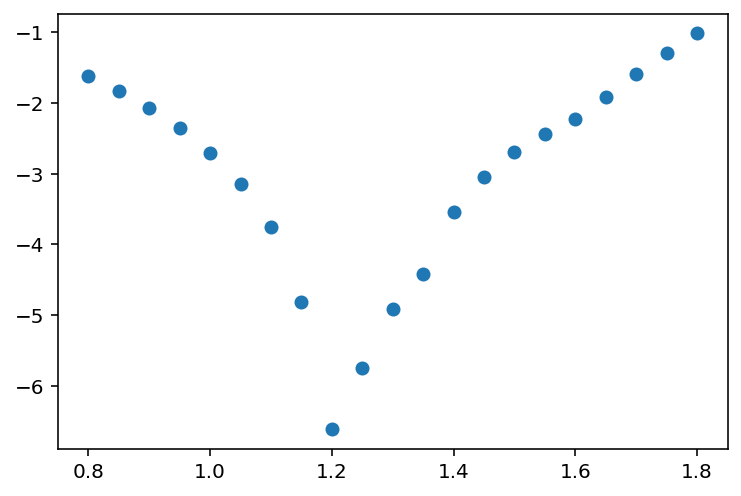

In [17]:
num = 21
omega = np.linspace(0.8, 1.8, num)
err1 = np.zeros(num)
for i in range(num):
    err1[i] = SOR2(A, b, x0, x_star, omega[i], 10)
print (err1)
plt.plot(omega, np.log10(err1), 'o')

**Example 6**
\begin{equation*}
    A = \left[\begin{array}{cccc} -4& 1 & 1 & 1 \\ 1 & -4 & 1 & 1 \\ 1 & 1& -4 &1 \\ 1 & 1 &1 & -4\end{array}\right],\quad b = \left[\begin{array}{c} 1 \\ 1 \\ 1 \\ 1\end{array}\right],
\end{equation*}
has the exact solution $x^{*} = {[-1, -1, -1, -1]}^T$

In [18]:
A = np.array([[-4, 1, 1, 1],[1, -4, 1, 1], [1, 1, -4, 1], [1, 1, 1, -4]])
b = np.array([1, 1, 1, 1])

x0 = np.zeros(np.size(b))
x_star = np.array([-1,-1,-1,-1])
omega = 1.25

w = interactive(SOR, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), omega=fixed(omega), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

In [19]:
w = interactive(Jacobi, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=100,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters'), Output()), _dom_classes=('widget-interact',))

In [ ]:
num = 21
omega = np.linspace(0.8, 1.8, num)
err1 = np.zeros(num)
for i in range(num):
    err1[i] = SOR2(A, b, x0, x_star, omega[i], 10)
print (err1)
plt.plot(omega, np.log10(err1), 'o')

**Example 7**
\begin{equation*}
    A=\begin{pmatrix}{3} & {-1} & {0} & 0 & 0 & \frac{1}{2}  \\ {-1} & {3} & {-1} & {0} & \frac{1}{2} & 0\\ {0} & {-1} & {3} & {-1} & {0} & 0 \\ 0& {0} & {-1} & {3} & {-1} & {0} \\ {0} & \frac{1}{2} & {0} & {-1} & {3} & {-1} \\ \frac{1}{2} & {0} & 0 & 0 & {-1} & {3}\end{pmatrix},\,\,b=\begin{pmatrix}\frac{5}{2} \\ \frac{3}{2} \\ 1 \\ 1 \\ \frac{3}{2}    \\ \frac{5}{2}  \end{pmatrix}
\end{equation*}
has the exact solution $x^{*} = {[1, 1, 1, 1, 1, 1]}^T$

In [44]:
n0 = 6
A = 3*np.eye(n0) - np.diag(np.ones(n0-1),-1) - np.diag(np.ones(n0-1),+1)
for i in range(n0):
    if (abs(n0-1 - 2*i) > 1):
        A[i, n0-1-i] = - 1/2
print (A)
x_star = np.ones(n0)
b = np.dot(A, x_star)

x0 = np.zeros(np.size(b))
omega = 1.25

w = interactive(SOR, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), omega=fixed(omega), iters=widgets.IntSlider(min=0,max=20,value=0))
display(w)

[[ 3.  -1.   0.   0.   0.  -0.5]
 [-1.   3.  -1.   0.  -0.5  0. ]
 [ 0.  -1.   3.  -1.   0.   0. ]
 [ 0.   0.  -1.   3.  -1.   0. ]
 [ 0.  -0.5  0.  -1.   3.  -1. ]
 [-0.5  0.   0.   0.  -1.   3. ]]


interactive(children=(IntSlider(value=0, description='iters', max=20), Output()), _dom_classes=('widget-intera…

[8.11460567e-02 4.85765566e-02 2.71408752e-02 1.38801874e-02
 6.31054367e-03 2.43341233e-03 7.31329852e-04 1.44683868e-04
 3.52249373e-05 1.06140468e-04 3.10896338e-04 7.79320660e-04
 1.78933502e-03 3.69241411e-03 7.75594331e-03 1.53175384e-02
 2.88162563e-02 5.21484221e-02 9.14546897e-02 1.64631746e-01
 2.98621588e-01]


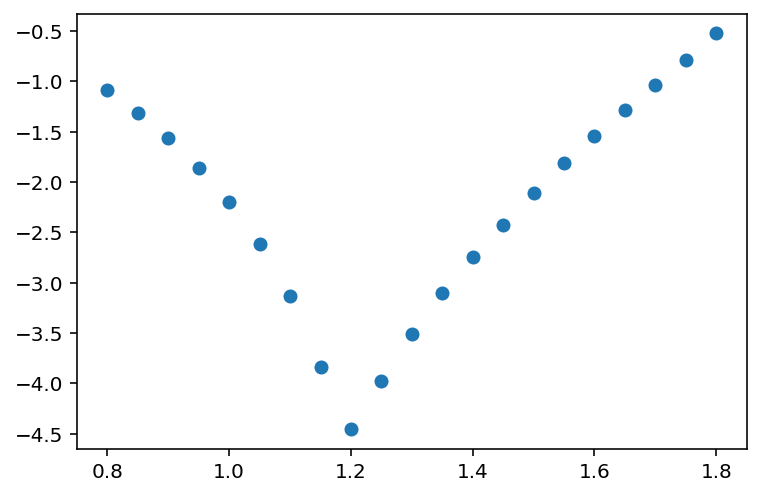

In [49]:
num = 21
omega = np.linspace(0.8, 1.8, num)
err1 = np.zeros(num)
for i in range(num):
    err1[i] = SOR2(A, b, x0, x_star, omega[i], 10)
print (err1)
plt.plot(omega, np.log10(err1), 'o')

In [48]:
w = interactive(Jacobi, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), iters=widgets.IntSlider(min=0,max=100,value=0))
display(w)

interactive(children=(IntSlider(value=0, description='iters'), Output()), _dom_classes=('widget-interact',))

In [59]:
n0 = 1000
A = 3*np.eye(n0) - np.diag(np.ones(n0-1),-1) - np.diag(np.ones(n0-1),+1)
for i in range(n0):
    if (abs(n0-1 - 2*i) > 1):
        A[i, n0-1-i] = - 1/2
# print (A)
x_star = np.ones(n0)
b = np.dot(A, x_star)

import scipy.linalg
P, L, U = scipy.linalg.lu(A)

x0 = np.zeros(np.size(b))
omega = 1.2
w = interactive(SOR3, A=fixed(A), b=fixed(b), x0=fixed(x0), x_star=fixed(x_star), omega=fixed(omega), iters=widgets.IntSlider(min=0,max=200,value=0, step=10))
display(w)

interactive(children=(IntSlider(value=0, description='iters', max=200, step=10), Output()), _dom_classes=('wid…

**Example 8**
\begin{equation*}
    A_1 = \left[\begin{array}{ccc} 3& 0 & 4 \\ 7 & 4 & 2 \\ -1 & 1 & 2\end{array}\right],\quad A_2 = \left[\begin{array}{ccc} -3& 3 & -6 \\ -4 & 7 & -8 \\ 5 & 7 & -9\end{array}\right],
\end{equation*}
\begin{equation*}
    A_3 = \left[\begin{array}{ccc} 3& 0 & 4 \\ 7 & 4 & 2 \\ -1 & 1 & 2\end{array}\right],\quad A_4 = \left[\begin{array}{ccc} -3& 3 & -6 \\ -4 & 7 & -8 \\ 5 & 7 & -9\end{array}\right],
\end{equation*}

## Application for Solving Laplace's Equation

In [21]:
def generate_TD(N, dx, dy):
    T = np.zeros([N,N])
    a = - (dy/dx)**2
    b = 2*(1 - a)
    for i in range(N):
        T[i,i] += b
        if (i < N-1):
            T[i,i+1] += a
        if (i > 0):
            T[i,i-1] += a
    D = -np.identity(N)
    return T, D

def assemble_matrix_A(dx, dy, N, M):
    T, D = generate_TD(N, dx, dy)
    A = np.zeros([N*M, N*M])
    for j in range(M):
        A[j*N:(j+1)*N,j*N:(j+1)*N] += T
        if (j < M-1):
            A[j*N:(j+1)*N,(j+1)*N:(j+2)*N] += D
        if (j > 0):
            A[j*N:(j+1)*N,(j-1)*N:j*N] += D
    return A

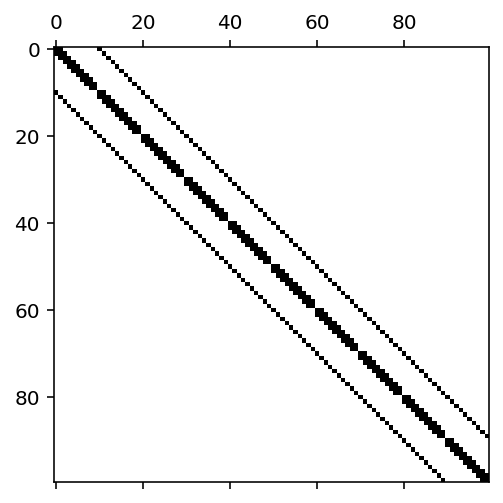

In [22]:
N = 10
M = 10
dx = 1./(N+1)
dy = 1./(M+1)
T, D = generate_TD(N, dx, dy)
#print (T)
A = assemble_matrix_A(dx, dy, N, M)
#print (A)
plt.spy(A)
plt.show()

In [23]:
# Set boundary conditions
def gL(y):
    return 0.

def gR(y):
    return 0.

def gB(x):
    return 0.

def gT(x):
    return 1.
    #return x*(1-x)*(4./5-x)*np.exp(6*x)
    
def assemble_vector_b(x, y, dx, dy, N, M, gL, gR, gB, gT):
    b = np.zeros(N*M)
    # Left BCs
    for j in range(M):
        b[(j-1)*N] += (dy/dx)**2*gL(y[j+1]) 
    
    # Right BCs
    # b +=
    
    # Bottom BCs
    # b +=
    
    # Top BCs:
    for i in range(N):
        b[(M-1)*N+i] += gT(x[i+1])
    return b

In [24]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

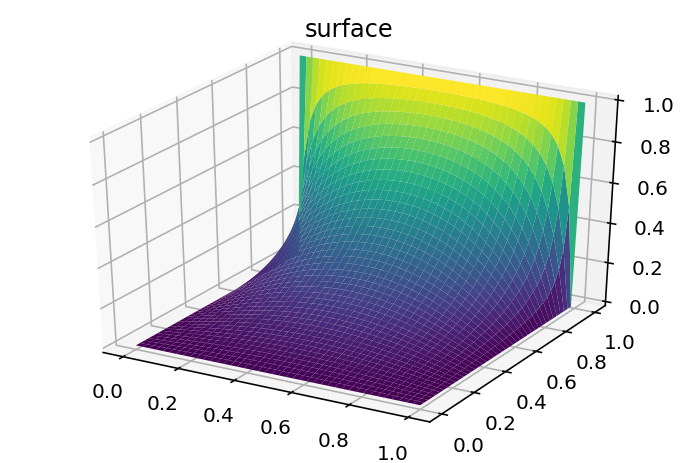

In [25]:
def Laplace_solver(a, b, N, M, gL, gR, gB, gT):
    dx = b/(M+1)
    dy = a/(N+1)
    x = np.linspace(0, a, N+2)
    y = np.linspace(0, b, M+2)
    
    A = assemble_matrix_A(dx, dy, N, M)
    b = assemble_vector_b(x, y, dx, dy, N, M, gL, gR, gB, gT)
    
    v = np.linalg.solve(A,b)
    
    # add boundary points + plotting
    u = np.zeros([(N+2),(M+2)])
    #u[1:(N+1),1:(M+1)] = np.reshape(v, (N, M))
    # Top BCs
    for i in range(N+2):
        u[i,M+1] = gT(x[i])
    u = np.transpose(u)
    u[1:(M+1),1:(N+1)] = np.reshape(v, (M, N))

    
    X, Y = np.meshgrid(x, y)
    #Z = np.sin(2*np.pi*X)*np.sin(2*np.pi*Y)

    fig = plt.figure()
    #ax = plt.axes(projection='3d')
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    ax.plot_surface(X, Y, u, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('surface')
    plt.show()
    
Laplace_solver(1, 1, 40, 40, gL, gR, gB, gT)

In [26]:
def Jacobi_tol(A, b, x0, tol):
    x_old = np.copy(x0)
    x_new = np.zeros(np.size(x0))
    for i in range(np.size(x0)): 
        x_new[i] = (b[i] - np.dot(A[i,:i],x_old[:i]) - np.dot(A[i,i+1:],x_old[i+1:]))/A[i,i]
    iters = 1
    while ((np.linalg.norm(x_new-x_old,np.inf)) > tol):
        x_old = np.copy(x_new)
        for i in range(np.size(x0)): 
            x_new[i] = (b[i] - np.dot(A[i,:i],x_old[:i]) - np.dot(A[i,i+1:],x_old[i+1:]))/A[i,i]
        iters += 1
    return x_new, iters

In [27]:
def GS_tol(A, b, x0, tol):
    x_old = np.copy(x0)
    x = np.copy(x0)
    for i in range(np.size(x0)): 
        x[i] = (b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
    iters = 1
    while ((np.linalg.norm(x-x_old,np.inf)) > tol):
        x_old = np.copy(x)
        for i in range(np.size(x0)): 
            x[i] = (b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
        iters += 1
    return x, iters

In [28]:
def SOR_tol(A, b, x0, omega, tol):
    x_old = np.copy(x0)
    x = np.copy(x0)
    for i in range(np.size(x0)): 
            x[i] = x[i] + omega*(b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i:],x[i:]))/A[i,i]
    iters = 1
    while ((np.linalg.norm(x-x_old,np.inf)) > tol):
        x_old = np.copy(x)
        for i in range(np.size(x0)): 
            x[i] = x[i] + omega*(b[i] - np.dot(A[i,:i],x[:i]) - np.dot(A[i,i:],x[i:]))/A[i,i]
        iters += 1
    return x, iters

In [29]:
def CG_tol(A, b, x0, x_star, tol):
    r_new = b - np.dot(A, x0) 
    r_old = np.copy(np.size(x0))
    d_old = np.zeros(np.size(x0))
    x = np.copy(x0)
    iters = 0
    while ((np.linalg.norm(x-x_star,np.inf)) > tol):
        if (iters == 0):
            d_new = np.copy(r_new)
        else:
            beta = np.dot(r_new,r_new)/np.dot(r_old,r_old)
            d_new = r_new + beta*d_old
        Ad = np.dot(A, d_new)
        alpha = np.dot(r_new,r_new)/np.dot(d_new,Ad)
        x += alpha*d_new
        d_old = d_new
        r_old = r_new
        r_new = r_old - alpha*Ad
        iters += 1
    return x, iters

In [30]:
def Iterative_solver(a, b, N, M, gL, gR, gB, gT, tol):
    dx = b/(M+1)
    dy = a/(N+1)
    x = np.linspace(0, a, N+2)
    y = np.linspace(0, b, M+2)
    
    A = assemble_matrix_A(dx, dy, N, M)
    b = assemble_vector_b(x, y, dx, dy, N, M, gL, gR, gB, gT)
    
    v = np.linalg.solve(A,b)
    #tol = 1.e-8
    v0 = np.zeros(np.size(b))
    #v_J, iters = Jacobi_tol(A, b, v0, tol)
    #print ("Jacobi Method:  %4d    %7.2e" %(iters, np.linalg.norm(v - v_J, np.inf)))
    
    #v_GS, iters = GS_tol(A, b, v0, tol)
    #print ("Gauss Seidel :  %4d    %7.2e" %(iters, np.linalg.norm(v - v_GS, np.inf)))
    
    omega = 2./(1 + np.sin(np.pi*dx))
    print ("omega = ", omega)
    v_SOR, iters = SOR_tol(A, b, v0, omega, tol)
    print ("SOR Method   :  %4d    %7.2e" %(iters, np.linalg.norm(v - v_SOR, np.inf)))
    
    v_CG, iters = CG_tol(A, b, v0, v, tol)
    print ("CG Method    :  %4d    %7.2e" %(iters, np.linalg.norm(v - v_CG, np.inf)))

In [31]:
Iterative_solver(1, 1, 10, 10, gL, gR, gB, gT, 1.e-4)

omega =  1.5603879212747742
SOR Method   :    23    7.85e-05
CG Method    :    18    7.52e-05
